<a href="https://colab.research.google.com/github/kishanAk21/Skin-Cancer-Image-Classification/blob/main/CBAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 4.9 MB/s 


In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Dependancies 

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Dropout, Input, Attention
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from keras.layers import Layer

In [6]:
# !unzip -qq "gdrive/My Drive/CNN_assignment.zip" -d ""

!unzip -qq "gdrive/MyDrive/HAM10000.zip" -d ""

In [25]:
# Defining the path for train and test images (location in google drive where images are stored)


data_dir_train = pathlib.Path("/content/train_dir/")
data_dir_test = pathlib.Path("/content/test_dir/")

In [31]:
# Defining Batch size and image size

batch_size = 8
img_height = 224
img_width = 224

In [11]:
# parameters for the network

input_shape = (img_height, img_width, 3)
num_labels = 7
epochs = 20
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Data Augmentation

In [12]:
# !pip install Augmentor
# import Augmentor

In [13]:
# path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset + i)
#     p.resize(1, img_height, img_width)
#     p.rotate(probability=0.3, max_left_rotation=25, max_right_rotation=25)
#     p.zoom(probability=0.3, min_factor=1.1, max_factor=1.5)
#     p.flip_random(0.3)
#     p.gaussian_distortion(probability=0.3, grid_width=5, grid_height=5, magnitude=5, corner='bell', method='in')
#     p.histogram_equalisation(probability=0.3)
#     p.random_brightness(probability=0.3, min_factor=0.3, max_factor=0.8)
#     p.random_color(probability=0.3, min_factor=0.3, max_factor=0.8)
#     p.random_contrast(probability=0.3, min_factor=0.25, max_factor=0.8)
#     p.random_erasing(probability=0.1, rectangle_area=0.12)
#     p.shear(probability=0.3, max_shear_left=20, max_shear_right=20)
#     p.skew(probability=0.3, magnitude=0.5)
#     p.sample(1000)

In [32]:
# Keras Generators

genrtr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

genrtr_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = genrtr.flow_from_directory(data_dir_train,
                                             target_size=(img_width, img_height),
                                             batch_size=batch_size,
                                             class_mode='categorical')

val_generator = genrtr_val.flow_from_directory(data_dir_test,
                                             target_size=(img_width, img_height),
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 53646 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.


# Model Building

CBAM: Convolution Block Attention Module

CBAM Paper: https://arxiv.org/pdf/1807.06521.pdf

Here we are implementing CBAM based model for image classification purpose. CBAM is CNN + Attention based block which utilizes the `soft attention` on the extracted features by `Convolution`. Attention is applied across the features/channels (weighting the channel improtance) as well as on each feature/channel (weighting the location on each feature). 

CBAM block is used to modify the `Resnet` based architencture. Resnet gives very good results as depth of the network is increased with the help of skip connection residue modelling approach. 
For more: https://arxiv.org/abs/1512.03385



In [27]:
from resnet_v2 import resnet_v2

In [28]:
# model building
model = resnet_v2(num_classes= 7, 
                    input_shape = input_shape,
                    attention_module= 'cbam_block',
                    depth = 47)

model.compile(loss='categorical_crossentropy',
              #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
400/400 [==============================] - 567s 1s/step - loss: 2.6544 - accuracy: 0.3262 - val_loss: 2.2569 - val_accuracy: 0.3107
Epoch 2/20
400/400 [==============================] - 557s 1s/step - loss: 2.1267 - accuracy: 0.4141 - val_loss: 1.9046 - val_accuracy: 0.4551
Epoch 3/20
400/400 [==============================] - 559s 1s/step - loss: 1.8676 - accuracy: 0.4487 - val_loss: 1.4785 - val_accuracy: 0.5868
Epoch 4/20
400/400 [==============================] - 558s 1s/step - loss: 1.7219 - accuracy: 0.4834 - val_loss: 3.4529 - val_accuracy: 0.2209
Epoch 5/20
400/400 [==============================] - 559s 1s/step - loss: 1.5961 - accuracy: 0.5094 - val_loss: 1.3827 - val_accuracy: 0.5875
Epoch 6/20
400/400 [==============================] - 558s 1s/step - loss: 1.5080 - accuracy: 0.5166 - val_loss: 1.4402 - val_accuracy: 0.5456
Epoch 7/20
400/400 [==============================] - 559s 1s/step - loss: 1.4659 - accuracy: 0.5309 - val_loss: 1.4990 - val_accuracy: 0.5176

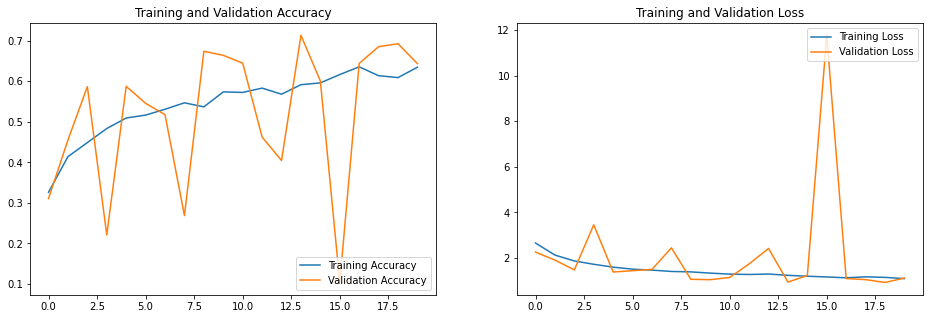

In [33]:
# Early stopping criteria
Earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, min_delta=0.001)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=epochs,
      validation_data = val_generator,
      callbacks = Earlystop)


# Ploting results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

It can be observed that,
- Validation `loss` and `accuracy` are staying closer to the corresponding training metric values, which is a positive sign. We can observe a few perturbations though.
- Further improvement in the model can be done with more `epochs` and increased `steps_per_epoch` value. (Here we have limited computing resources hence havent tried that.)

In [34]:
# Saving the model

model.save("my_h5_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


----------